<a href="https://colab.research.google.com/github/anushChrist/ML_LAB/blob/main/2348504_Lab4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [48]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import time
import threading
import warnings
warnings.filterwarnings("ignore")
from mlxtend.frequent_patterns import apriori, fpgrowth, association_rules

Creating datafrome

In [49]:
df = pd.read_csv('/content/Groceries_dataset.csv')
df

,Member_number,Date,itemDescription
0,1808,21-07-2015,tropical fruit
1,2552,05-01-2015,whole milk
2,2300,19-09-2015,pip fruit
3,1187,12-12-2015,other vegetables
4,3037,01-02-2015,whole milk
...,...,...,...
38760,4471,08-10-2014,sliced cheese
38761,2022,23-02-2014,candy
38762,1097,16-04-2014,cake bar
38763,1510,03-12-2014,fruit/vegetable juice


Checking which times are bougth most frequently

In [50]:
x = df['itemDescription'].value_counts().sort_values(ascending=False)
x

whole milk               2502
other vegetables         1898
rolls/buns               1716
soda                     1514
yogurt                   1334
                         ... 
rubbing alcohol             5
bags                        4
baby cosmetics              3
kitchen utensil             1
preservation products       1
Name: itemDescription, Length: 167, dtype: int64

Creating binary transaction matrix

In [51]:
df['Quantity'] = 1
transactions =  df.groupby(['Member_number','itemDescription'])['Quantity'].sum().unstack().reset_index().set_index('Member_number')
def encode(x):
    if x >= 0:
        return True
    else:
        return False
basket = transactions.applymap(encode)
basket

itemDescription,Instant food products,UHT-milk,abrasive cleaner,artif. sweetener,baby cosmetics,bags,baking powder,bathroom cleaner,beef,berries,...,turkey,vinegar,waffles,whipped/sour cream,whisky,white bread,white wine,whole milk,yogurt,zwieback
Member_number,,,,,,,,,,,,,,,,,,,,,
1000,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,True,True,False
1001,False,False,False,False,False,False,False,False,True,False,...,False,False,False,True,False,True,False,True,False,False
1002,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False
1003,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1004,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4996,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4997,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,True,True,False,False
4998,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


Asking the user for the minimum support

In [52]:
m_sup = float(input("Minimum Suport"))

Minimum Suport0.05


Creating threading.Event for multithreading

In [53]:
    apicompleted=threading.Event()
    fpcompleted=threading.Event()

Setting the insitial execution time to zero

In [54]:
exetime=[0,0]

Funciton for Apriori Algorithm

In [55]:
def runapi():
  stime=time.time()
  apriori_result = apriori(basket, min_support=m_sup, use_colnames=True)
  exetime[0]=time.time()-stime
  apicompleted.set()

Funciton for FP Growth Algorithm

In [56]:
def runfp():
    stime=time.time()
    fp_result = fpgrowth(basket, min_support=m_sup, use_colnames=True)
    exetime[1]=time.time()-stime
    fpcompleted.set()

Runing the threads

In [57]:
apthread=threading.Thread(target=runapi)
fpthread=threading.Thread(target=runfp)

In [58]:
apthread.start()
fpthread.start()
apicompleted.wait()
fpcompleted.wait()
apthread.join()
fpthread.join()

Plotting using bar chart

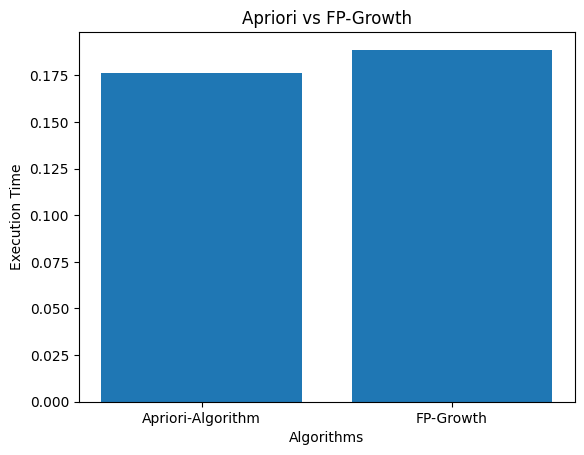

Apriori is Faster


In [59]:
algorithms=['Apriori-Algorithm','FP-Growth']
plt.bar(algorithms,exetime)
plt.xlabel('Algorithms')
plt.ylabel('Execution Time')
plt.title('Apriori vs FP-Growth')
plt.show()
if exetime[0]<exetime[1]:
  print("Apriori is Faster")
elif exetime[1]<exetime[0]:
  print("FP-Growth is Faster")
else:
  print("Both are equal")

Function to check rules if the user asks to and asks for confidence value.

In [60]:
def check_rules():
    confidence = input("Confidence: ")
    frequent_itemsets = fpgrowth(basket, min_support=m_sup, use_colnames=True)
    rules = association_rules(frequent_itemsets, metric="confidence", min_threshold=float(confidence))
    print(rules.sort_values(by = 'confidence', ascending = False))

Asking the user if they want to check for association rules as well.

In [61]:
choice = input('Enter Yes to check for association: ')
if choice == 'Yes':
    check_rules()

Enter Yes to check for association: Yes
Confidence: 0.5
                           antecedents         consequents  \
24   (other vegetables, bottled water)        (whole milk)   
4           (other vegetables, yogurt)        (whole milk)   
5                 (rolls/buns, yogurt)        (whole milk)   
11      (rolls/buns, other vegetables)        (whole milk)   
3                       (yogurt, soda)        (whole milk)   
1             (other vegetables, soda)        (whole milk)   
16  (other vegetables, tropical fruit)        (whole milk)   
0                   (rolls/buns, soda)        (whole milk)   
20                     (shopping bags)        (whole milk)   
7          (sausage, other vegetables)        (whole milk)   
25                      (bottled beer)        (whole milk)   
18                 (frozen vegetables)        (whole milk)   
14                              (beef)        (whole milk)   
2                             (yogurt)        (whole milk)   
9             